<a href="https://colab.research.google.com/github/kheireldine/Machine-learning-Projects/blob/main/Big_data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X_ray Image Classification 

Prepared by: Kheir el dine baarini and Rula Bissar. 
Submitted to Dr. Rola Naja.
Course: Big data _ M2R

The dataset of this project will be downloaded from kaggle and it is called [covid19-radiography-database](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database). It will be downloaded directly from kaggle without downloading and reuploading it from your device.

**1-Download and Import Dataset**

To import a dataset from kaggle directly to colab, you have to create an API token. To do that use the following procedure:
Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:

1) ! pip install -q kaggle

2) from google.colab import files

files.upload()

Choose the kaggle.json file that you downloaded

3) ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

Make directory named kaggle and copy kaggle.json file there.

4) ! chmod 600 ~/.kaggle/kaggle.json

Change the permissions of the file.

5) ! kaggle datasets list
- That's all ! You can check if everything's okay by running this command.

Download Data
! kaggle competitions download -c 'name-of-competition'

Use unzip command to unzip the data:

For example,

Create a directory named train,

! mkdir train

unzip train data there,

! unzip train.zip -d train

In the 1st cell we will try to install kaggle library if you don't have the library installed.

In [ ]:
! pip install -q kaggle

The following cell will help you to upload the kaggle.json file you downloaded from your kaggle account. 

In [ ]:
from google.colab import files
files.upload()

{}

The following cell creates a new direction called kaggle


In [1]:
! mkdir ~/.kaggle

In case you faced a version problem between kaggle and colab. You can use the following code to upgrade kaggle by force.

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle -v

     |████████████████████████████████| 58 kB 3.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=a443dd9a839f5240b4cd2803ae599d52613d83717b13afd6757b9992ddce3b34
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


chmod is the command and system call used to change the access permissions of file system objects

In [2]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

List Kaggle datsets

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18304       1419  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10982        771  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5517        356  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

Now we have to download our dataset from kaggle.

In [4]:
! kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 98% 732M/745M [00:03<00:00, 202MB/s]
100% 745M/745M [00:03<00:00, 200MB/s]


Unzip the downloaded dataset and save the content to the output folder.

In [5]:
!unzip "/content/covid19-radiography-database.zip" -d "/content/output_folder/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: /content/output_folder/COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: /content/output_folder/COVID-19_Radi

**Importing the required Libraries**

We downloaded and Unzipped our datasets and our folders are ready now (We have to generate train and validation datasets laster).

In [27]:
import os 
import pickle
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Model
from numpy.random import seed
from numpy.random import randint
from tabulate import tabulate
import pickle
import skimage
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


**Data Generation**

This function is used to generate a dataset from a directory.  We already donwloaded our dataset and we will be uing the folder path we already mentioned.

[ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator):Generate batches of tensor image data with real-time data augmentation.

image_generator.flow_from_directory: Takes the path to a directory & generates batches of augmented data.

In [7]:
def generate_dataset_from_directory(folder_path, size = 224,batch_size = 32): 

    #Note that the directory is divded between train and test images
    image_generator = ImageDataGenerator(
        samplewise_center=True, #Set each sample mean to 0.
        samplewise_std_normalization= True, # Divide each input by its standard deviation]
        #rescale=1./255,
        validation_split = 0.3 #30% of training images will be for validation
    )

    #create training and testing datasets
    train_data = image_generator.flow_from_directory(directory = 
        folder_path,
        class_mode="categorical",
        color_mode="rgb",
        target_size = (size, size),
        batch_size  = batch_size,
        shuffle=True,
        seed=123,
        subset="training"
    )

    #create training and testing datasets
    val_data = image_generator.flow_from_directory(directory = 
        folder_path,
        class_mode="categorical",
        color_mode="rgb",
        target_size = (size, size),
        batch_size  = batch_size,
        shuffle=True,
        seed=123,
        subset="validation"
    )

    return train_data, val_data

Now our data generator is ready and we will apply this function on the dataset we stored in the output folder.
(folder path is '/content/output_folder/COVID-19_Radiography_Dataset')

In [8]:
folder_path = '/content/output_folder/COVID-19_Radiography_Dataset'
train_data, val_data = generate_dataset_from_directory(folder_path, size = 128,batch_size = 32)

Found 14818 images belonging to 4 classes.
Found 6347 images belonging to 4 classes.


We have 128818 images for training and 6347 images for validation (70-30)

**Data Preparation and Visualization**

Here we are going to extract class names from the training dataset. 
we have 4 classes inside this dataset . because we are trying to classify
the images between People between Normal and attacked by covid, Pneumonia or lung_


In [9]:
class_names = train_data.class_indices
class_names
# assign data
mydata = [{"Covid",class_names['COVID']},
          {"Lung_Opacity",class_names['Lung_Opacity']},
          {"Normal",class_names['Normal']},
          {"Viral Pneumonia",class_names['Viral Pneumonia']}]
  
# create header
head = ["Class_code", "ClassName"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-----------------+-------------+
| Class_code      | ClassName   |
+=================+=============+
| 0               | Covid       |
+-----------------+-------------+
| Lung_Opacity    | 1           |
+-----------------+-------------+
| 2               | Normal      |
+-----------------+-------------+
| Viral Pneumonia | 3           |
+-----------------+-------------+


Class Names List

In [10]:
classes = list(class_names.keys())
classes

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

Data augmentation

In [11]:
images,labels = next(train_data)
labels = np.argmax(labels, axis=1)
class_dict = train_data.class_indices
class_dict_inv = dict((v, k) for k, v in class_dict.items())
y_names = [class_dict_inv[key] for key in labels]

Now we will take a look and do some analysis in our dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

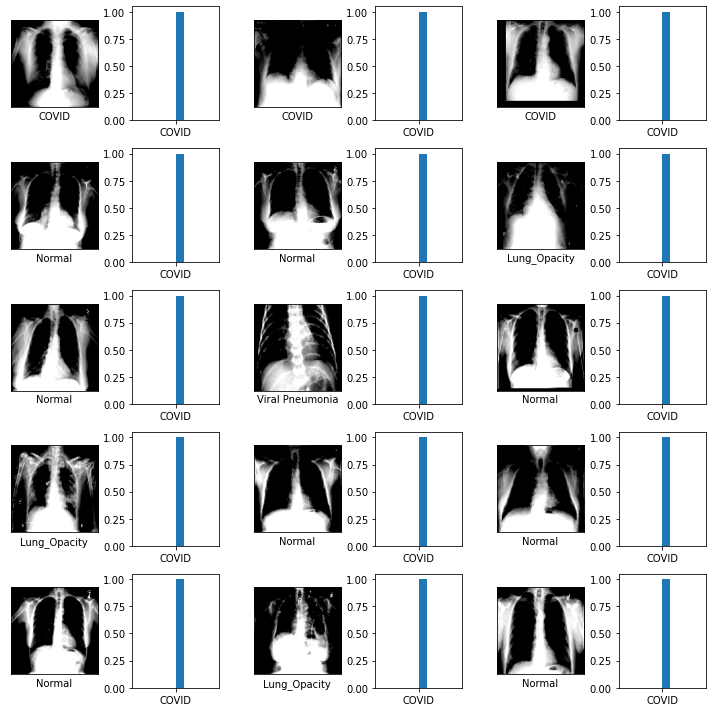

In [12]:
np.array(images,np.int32);
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,6,2*i+1)  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[labels[i]])
    plt.subplot(5,6,2*i+2)
    plt.hist(classes[np.argmax(classes[labels[i]])])

plt.tight_layout()
plt.show()

Let's see and analyse a random image now

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


+-----------------------------------------+----------------------------------------+
| Parameter                               | Value                                  |
+=========================================+========================================+
| 128                                     | The dimensions of the image are: width |
+-----------------------------------------+----------------------------------------+
| The dimensions of the image are: Height | 128                                    |
+-----------------------------------------+----------------------------------------+
| 1.8368024826049805                      | The maximum pixel value is             |
+-----------------------------------------+----------------------------------------+
| -2.3305845260620117                     | The minimum pixel value is             |
+-----------------------------------------+----------------------------------------+
| 1.4901161193847656e-08                  | The mean value of the

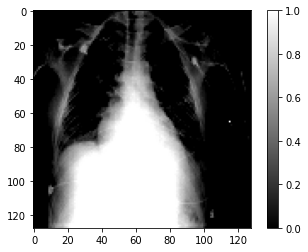

In [13]:
# seed random number generator
seed(1)
# Investing single image
# Here we will do some Operations on a random image
randoom_image = images[randint(0,len(images))]
plt.imshow(randoom_image, cmap='gray')
plt.colorbar(),
# assign data
mydata = [
          {"The dimensions of the image are: width",randoom_image.shape[0]}, 
          {"The dimensions of the image are: Height", randoom_image.shape[1]}, 
          {"The maximum pixel value is",randoom_image.max()}, 
          {"The minimum pixel value is",randoom_image.min()}, 
          {"The mean value of the pixels is", randoom_image.mean()}, 
          {"and the standard deviation is", randoom_image.std()}]
  
# create header
head = ["Parameter", "Value"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

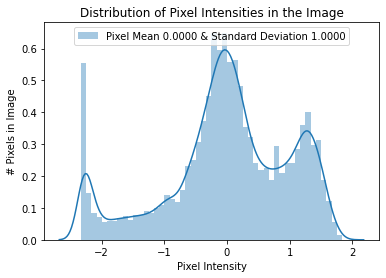

In [ ]:
import seaborn as sns
# Plot a histogram of the distribution of the pixels
sns.distplot(randoom_image.ravel(), 
             label=f'Pixel Mean {np.mean(randoom_image):.4f} & Standard Deviation {np.std(randoom_image):.4f}', kde=True)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

Gray Scale image. In the following cell we will select only Gray Scale.

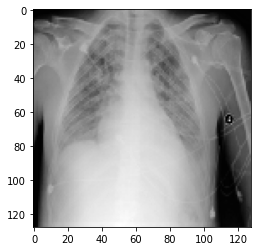

In [23]:
grayscale_img = randoom_image[:, :, 0]
plt.imshow(grayscale_img, cmap='gray')


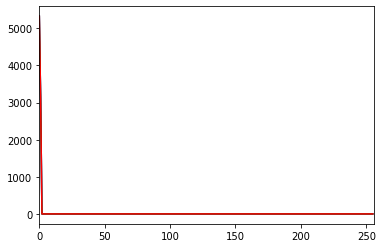

In [22]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([randoom_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Now we will see the distribution of pixels inside this image

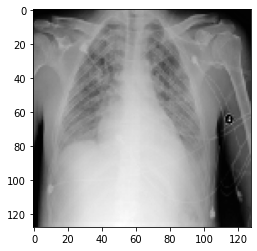

In [25]:
image=randoom_image
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

Let’s write the code below to normalize our data.

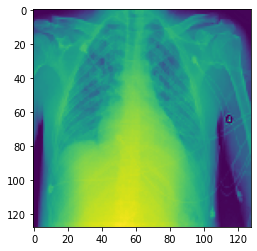

In [26]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

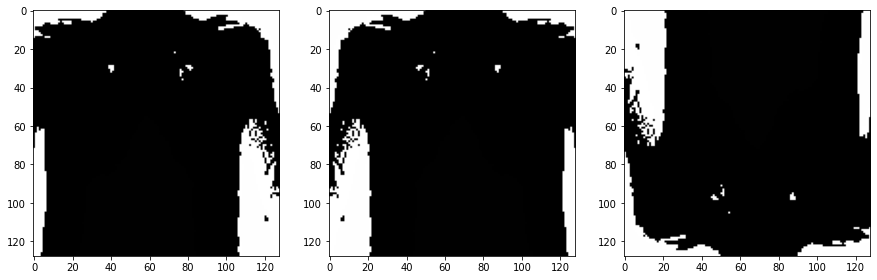

In [28]:


# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

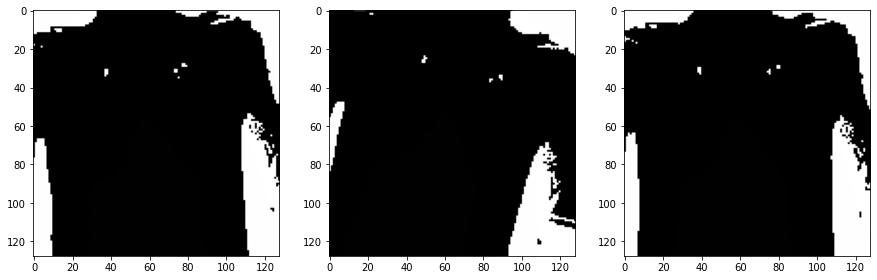

In [29]:
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

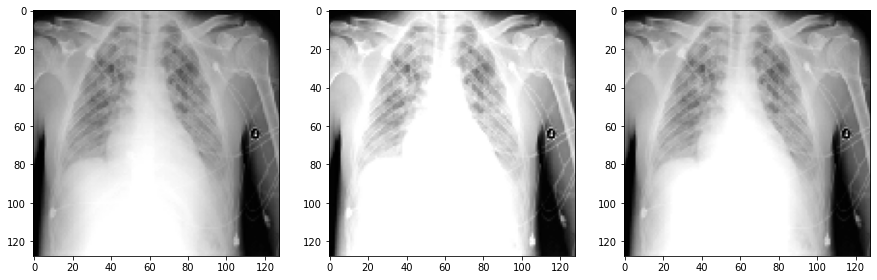

In [30]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


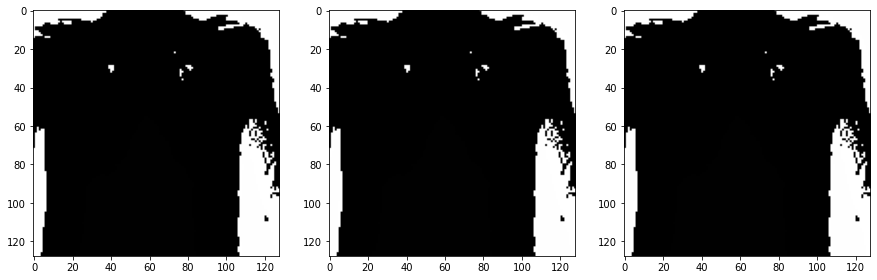

In [31]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

Now we will plot The heatmap of pixels inside the image

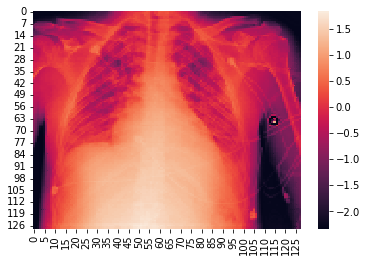

In [32]:

uniform_data = np.random.rand(10, 12)

ax = sns.heatmap(gray_image)
plt.show()

In [33]:
all_items,dirs,files = next(os.walk(folder_path))

In the following 2 cells we are visualizing the count of classes in our dataset.

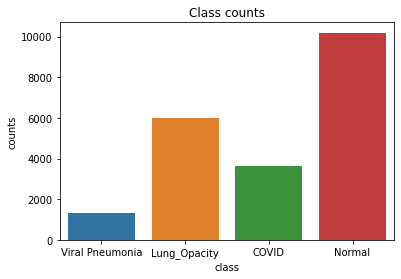

,class,counts
0,Viral Pneumonia,1345
1,Lung_Opacity,6012
2,COVID,3616
3,Normal,10192


In [34]:
image_in_classes = []
for i in range(len(dirs)):
    no_of_images =len(os.listdir(os.path.join(folder_path,dirs[i])))
    image_in_classes.append(no_of_images)
df_data = {'class': dirs,'counts': image_in_classes}
classes_df = pd.DataFrame(df_data)    

sns.barplot(x = 'class', y = 'counts',data = classes_df)

plt.title('Class counts')
plt.show()
classes_df

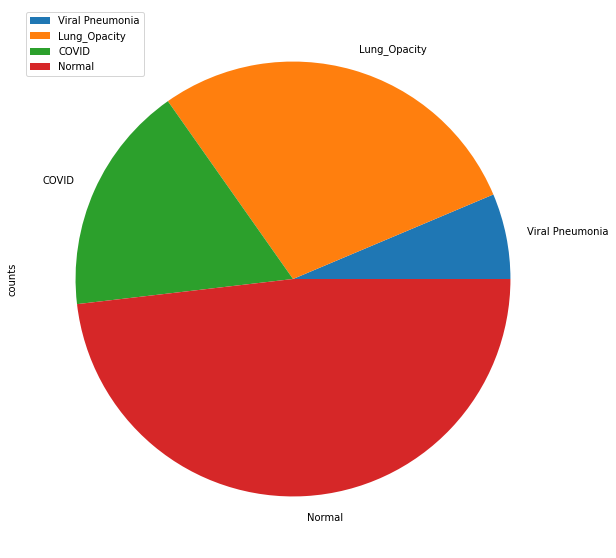

In [35]:

plot = classes_df.plot.pie(y='counts',labels = classes_df['class'],figsize=(10, 10))

The Following function code will be used to plot the loss and accuracy of model after doing preidctions

In [36]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig, ax = plt.subplots(1,2,figsize=(20,10))
  ax[0].plot(epochRange,history.history['accuracy'],'b',label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],'r',label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch', fontsize = 20)
  ax[0].set_ylabel('Accuracy', fontsize = 20)
  ax[0].legend()
  ax[0].grid(color='gray', linestyle='--')
  ax[1].plot(epochRange,history.history['loss'],'b',label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],'r',label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch', fontsize = 20)
  ax[1].set_ylabel('Loss', fontsize = 20)
  ax[1].legend()
  ax[1].grid(color='gray', linestyle='--')
  plt.show()

**Building Models**

CNN Model

In [37]:
def cnn_model(train_data,test_data, epochs,size):
#Building the model using Keras functional API
    print("----Building the model----")
    i = Input(shape=(size,size,3)) #defining input
    x = BatchNormalization()(i)
    x = Conv2D(32,3, activation= 'relu')(i) #adding convolution layers
    x = MaxPooling2D()(x)
    x = Dropout(0.2)(x)
    x = Conv2D(64, 3, activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.2)(x)
    x = Conv2D(128, 3, activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(4, activation= 'softmax')(x)

    model = Model(i,x)
    model.summary()
#Training the Convolutional Neural Network
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience = 5 ,
                               restore_best_weights=True)
    #model_checkpoint
    mc = ModelCheckpoint('cnn_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    r = model.fit(train_data, 
                  validation_data = val_data, 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32,
                  callbacks = [early_stop,mc])
    print("Train score:", model.evaluate(train_data))
    print("Test score:", model.evaluate(val_data))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

RestNet Model

In [38]:
#This function is generated to automate the resnet model in training. 

def resnet_model(train_data,test_data, epochs,size):
#Building the model using Keras functional API
    print("----Building the model----")
    
    base_model = ResNet50(input_shape= (size,size,3), include_top=False)
#     base_model.trainable=False #freezing the layer


    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    out=Dense(4,activation='softmax')(x)

    model=Model(inputs=base_model.input,outputs=out) 
    # model.summary()
#Training the Convolutional Neural Network
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience = 5 ,
                               restore_best_weights=True)
    #model_checkpoint
    mc = ModelCheckpoint('resnet_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    r = model.fit(train_data, 
                  validation_data = val_data, 
                  epochs = epochs, 
                  verbose = 2,
                  batch_size = 32,
                  callbacks = [early_stop,mc])
    print("Train score:", model.evaluate(train_data))
    print("Test score:", model.evaluate(val_data))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs 

**Training Models**

CNN Model

In [ ]:
epochs = 20
r,model,n_epochs = cnn_model(train_data, val_data,epochs,128)
plotLearningCurve(r,n_epochs)

----Building the model----
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                              

KeyboardInterrupt: ignored

In [ ]:
filename= 'cnn_model.sav'
pickle.dump(model, open(filename, 'wb'))

RestNet Model

In [ ]:
epochs = 3
r,model1,n_epochs = resnet_model(train_data, val_data,epochs,128)
plotLearningCurve(r,n_epochs)

In [ ]:
filename1 = 'restnet_model.sav'
pickle.dump(model1, open(filename1, 'wb'))

**Load Model**

We can't  train the model every time because it takes multi-hours. We saved our models and we can load them directly.

ResNet Model

In [52]:
filename3 = '/content/resnet_model.h5'
resnet_model = pickle.load(open(filename3, 'rb'))
dot_img_file = '/tmp/model_2.png'
tf.keras.utils.plot_model(resnet_model, to_file=dot_img_file, show_shapes=True)

UnpicklingError: ignored

Vgg16 Model

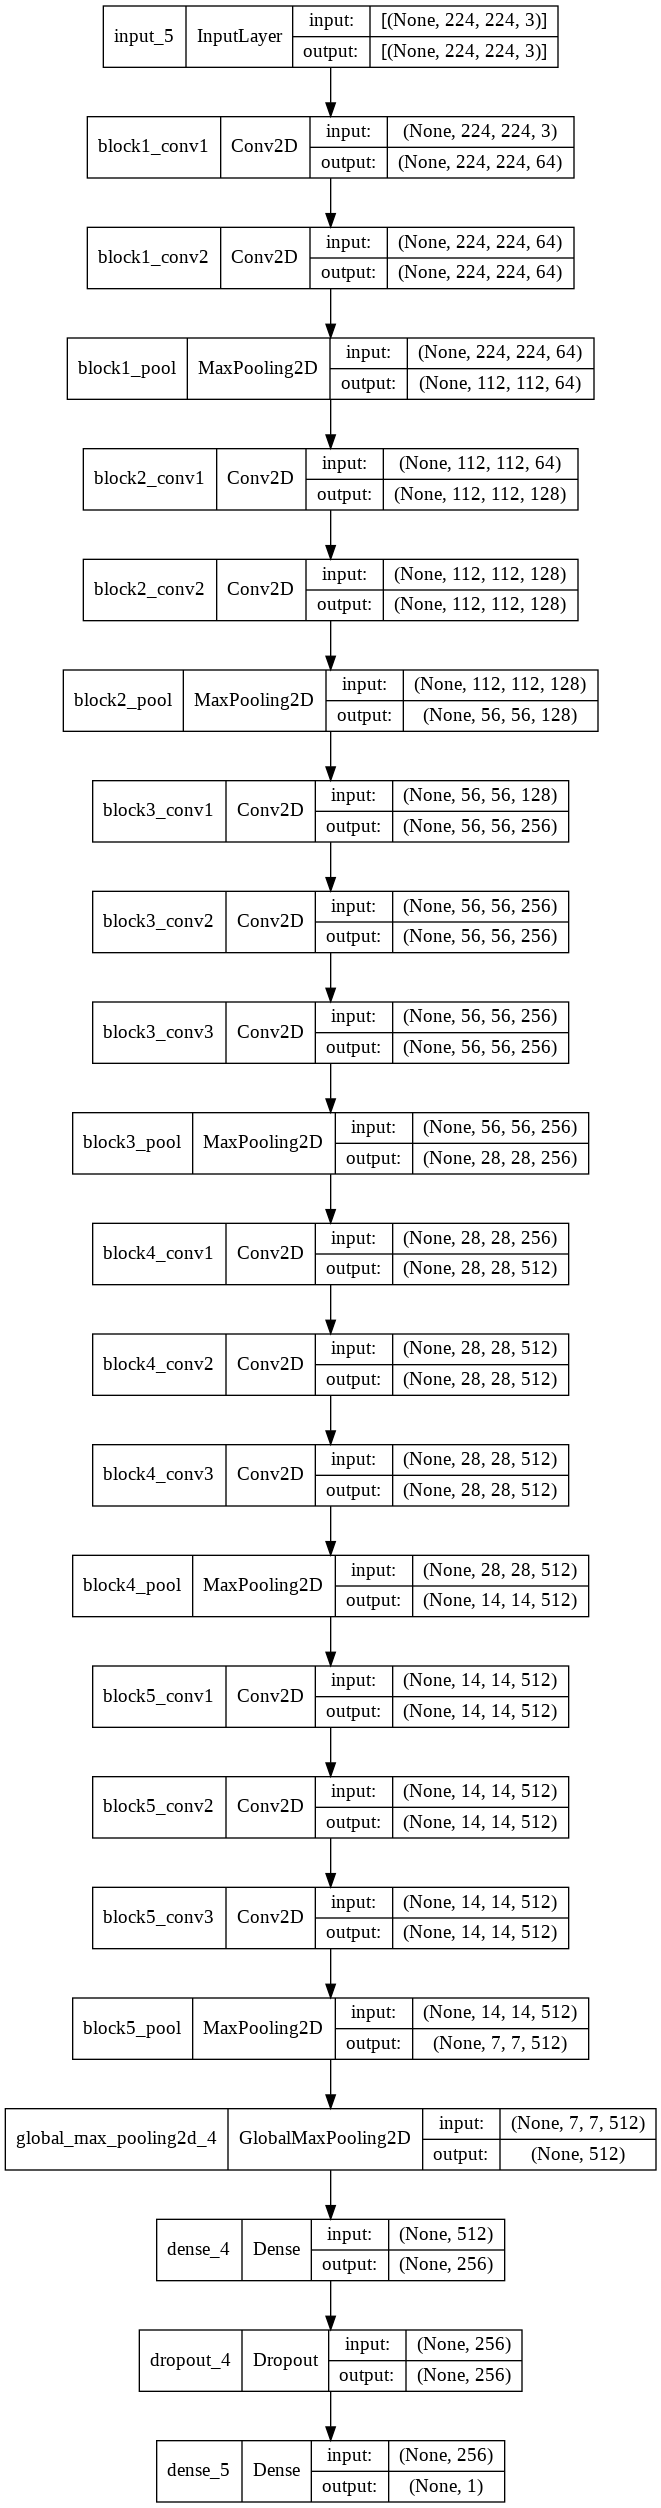

In [43]:
filename4 = '/content/vgg16_model.sav'
vgg16_model = pickle.load(open(filename4, 'rb'))
dot_img_file = '/tmp/model_3.png'
tf.keras.utils.plot_model(vgg16_model, to_file=dot_img_file, show_shapes=True)

CNN Model

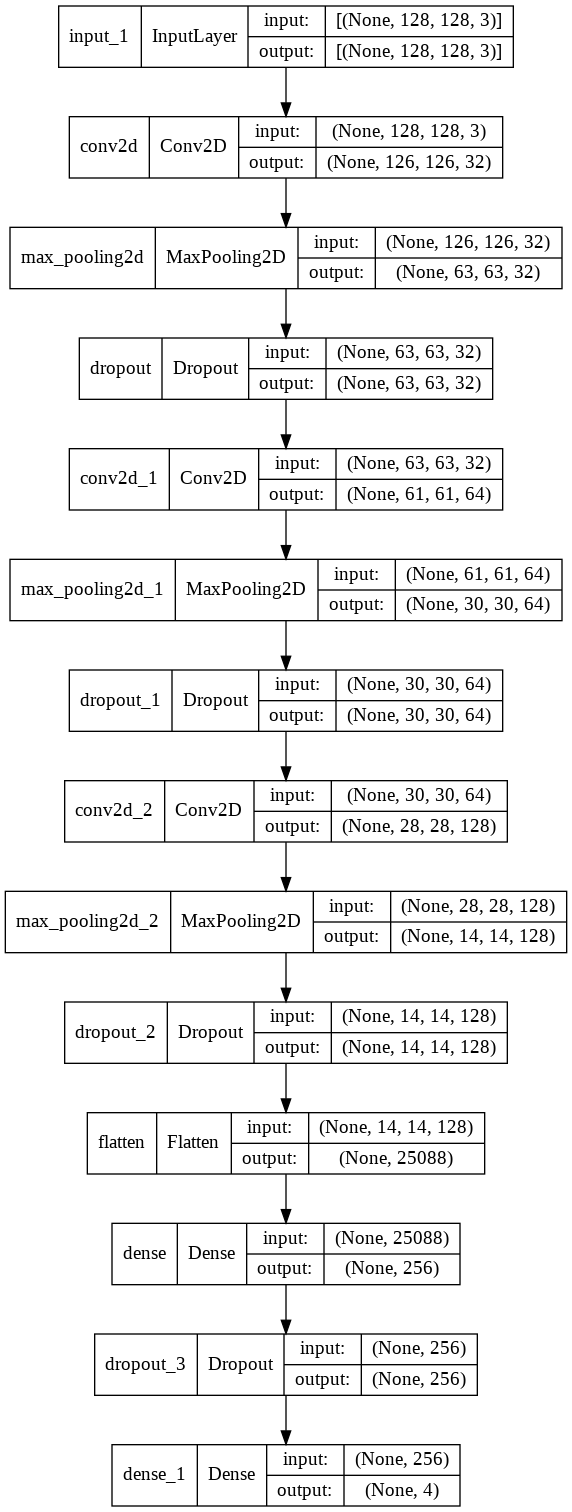

In [54]:
filename5 = '/content/cnn_model.sav'
cnn_model = pickle.load(open(filename5, 'rb'))
dot_img_file = '/tmp/model_cnn.png'
tf.keras.utils.plot_model(cnn_model, to_file=dot_img_file, show_shapes=True)

In [ ]:
loaded_model.fit(x_train, y_train, epochs = 10, validation_data = (x_test,y_test),verbose=1)

**Model Evaluation**

vgg16

In [ ]:
# printing model accuracy for train and test data
test_evaluation2 = vgg16_model.evaluate(val_data)
print(f"Test Accuracy using VGG16: {test_evaluation2[1] * 100:.2f}%")

train_evaluation2 = vgg16_model.evaluate(train_data)
print(f"Train Accuracy using VGG16: {train_evaluation2[1] * 100:.2f}%")

  4/199 [..............................] - ETA: 16:50 - loss: 0.5634 - accuracy: 0.7500

In [44]:
probability_model = tf.keras.Sequential([vgg16_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(val_data)

In [45]:
predictions[0]

array([1.], dtype=float32)

In [46]:
np.argmax(predictions[0])

0

CNN Model

In [60]:
# printing model accuracy for train and test data
test_evaluation = cnn_model.evaluate(val_data)
print(f"Test Accuracy using CNN: {test_evaluation[1] * 100:.2f}%")

train_evaluation = cnn_model.evaluate(train_data)
print(f"Train Accuracy using CNN: {train_evaluation[1] * 100:.2f}%")

199/199 [==============================] - 60s 302ms/step - loss: 0.3481 - accuracy: 0.8856
Test Accuracy using CNN: 88.56%
464/464 [==============================] - 142s 305ms/step - loss: 0.1178 - accuracy: 0.9625
Train Accuracy using CNN: 96.25%


In [55]:
probability_model1 = tf.keras.Sequential([cnn_model, 
                                         tf.keras.layers.Softmax()])
predictions1 = probability_model1.predict(val_data)

In [56]:
predictions1[0]

array([0.17508152, 0.47479436, 0.17515591, 0.17496823], dtype=float32)

In [57]:
np.argmax(predictions1[0])

1

ResNet Model

In [ ]:
# printing model accuracy for train and test data
test_evaluation1 = resnet_model.evaluate(val_data)
print(f"Test Accuracy using ResNet50: {test_evaluation1[1] * 100:.2f}%")

train_evaluation1 = resnet_model.evaluate(train_data)
print(f"Train Accuracy using ResNet50: {train_evaluation1[1] * 100:.2f}%")

In [ ]:
probability_model2 = tf.keras.Sequential([resnet_model, 
                                         tf.keras.layers.Softmax()])
predictions2 = probability_model2.predict(val_data)

In [ ]:
predictions2[0]

In [ ]:
np.argmax(predictions[0])

Plotting Results

In [48]:
images_val,labels_val = next(val_data)
labels_val = np.argmax(labels_val, axis=1)
class_dict_val = val_data.class_indices
class_dict_inv_val = dict((v, k) for k, v in class_dict_val.items())
y_names = [class_dict_inv_val[key] for key in labels]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

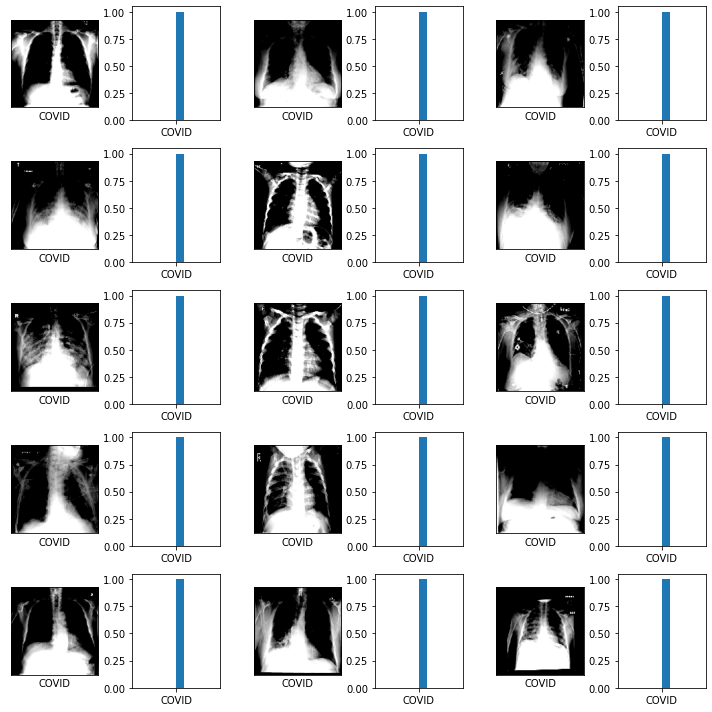

In [49]:

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,6,2*i+1)  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  
    plt.imshow(images_val[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(predictions[i])])
    plt.subplot(5,6,2*i+2)
    plt.hist(classes[np.argmax([predictions[i]])])

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

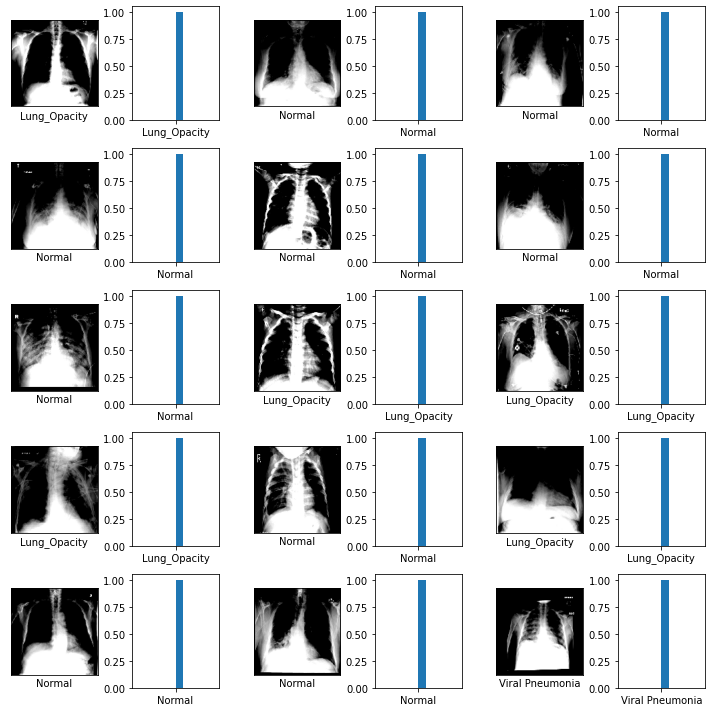

In [61]:

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,6,2*i+1)  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  
    plt.imshow(images_val[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(predictions1[i])])
    plt.subplot(5,6,2*i+2)
    plt.hist(classes[np.argmax([predictions1[i]])])

plt.tight_layout()
plt.show()

In [ ]:

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,6,2*i+1)  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)  
    plt.imshow(images_val[i], cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(predictions2[i])])
    plt.subplot(5,6,2*i+2)
    plt.hist(classes[np.argmax([predictions2[i]])])

plt.tight_layout()
plt.show()

In [ ]:
#Upload Your own image 
from google.colab import files

files.upload()

**Fine Tuning**

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D, MaxPooling2D,GlobalMaxPooling2D
from keras.models import Model
from keras import optimizers
from keras import layers
from tensorflow import keras
image_size = 224
input_shape = (image_size, image_size, 3)

batch_size = 16

pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(256, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
from tensorflow.keras.models import Model
x = layers.Dense(1, activation='sigmoid')(x)

model_vgg19 = Model(pre_trained_model.input, x)

model_vgg19.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model_vgg19.summary()

In [ ]:
epochs = 1

model_vgg19.fit_generator(
    train_data,
    epochs=epochs,
    validation_data=val_data)

In [ ]:
import pickle
filename1 = 'vgg19_model.sav'
pickle.dump(model_vgg16, open(filename1, 'wb'))

In [ ]:
# printing model accuracy for train and test data
test_evaluation = model_vgg16.evaluate(val_data)
print(f"Test Accuracy using ResNet50: {test_evaluation[1] * 100:.2f}%")

train_evaluation = model_vgg16.evaluate(train_data)
print(f"Train Accuracy using ResNet50: {train_evaluation[1] * 100:.2f}%")

EfficientB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

In [ ]:
model = EfficientNetB0(include_top=False, weights='imagenet')

**EXTRA**

In [ ]:
import os

import numpy as np
import pandas as pd
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
import keras.applications.xception as xception
import keras.applications.inception_v3 as inception_v3
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

%matplotlib inline

In [ ]:
resnet_model = ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
xception_model = xception.Xception(weights='imagenet')

In [ ]:
resnet_model.compile(optimizer= Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# printing model accuracy for train and test data
test_evaluation = resnet_model.evaluate(val_data)
print(f"Test Accuracy using CNN: {test_evaluation[1] * 100:.2f}%")

train_evaluation = resnet_model.evaluate(train_data)
print(f"Train Accuracy using CNN: {train_evaluation[1] * 100:.2f}%")